Predicting prices

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [91]:
df=pd.read_csv('data\\brooklyn_listings.csv')
df=df.dropna()
df.head()
#print(df.to_string())

,Unnamed: 0,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,1,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
4,5,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"
6,7,2600000.0,5,4,3600.0,Park Slope,sold,"645 Carroll St, Brooklyn, NY 11215"
7,8,4050000.0,4,4,3600.0,Park Slope,sold,"538 9th St #4, Brooklyn, NY 11215"
8,9,2400000.0,3,3,1428.0,Park Slope,sold,"910 Union St #7A, Brooklyn, NY 11215"


In [92]:
x_data=df[['bedrooms','sqft']]
print(x_data)
y_data=df['price']
print(y_data)

       bedrooms    sqft
0             4  2940.0
4             0  1066.0
6             5  3600.0
7             4  3600.0
8             3  1428.0
...         ...     ...
14727         2   867.0
14728         0  1492.0
14729         4  1584.0
14730         0   564.0
14732         3  1470.0

[12012 rows x 2 columns]
0        4100000.0
4         908000.0
6        2600000.0
7        4050000.0
8        2400000.0
           ...    
14727     765000.0
14728     630000.0
14729     998000.0
14730     830000.0
14732     629000.0
Name: price, Length: 12012, dtype: float64


In [108]:
poly=PolynomialFeatures(degree=3)
x=poly.fit_transform(x_data)
lr=LinearRegression()
lr.fit(x,y_data)
y_pred=lr.predict(x)
print(y_pred)
lr.coef_
mean_squared_error(y_data,y_pred,squared=False)

[1786008.28245899  793177.95766843 2095452.2370135  ... 1260894.18431043
  635101.38583049 1176275.61738971]


1101037.0596981014

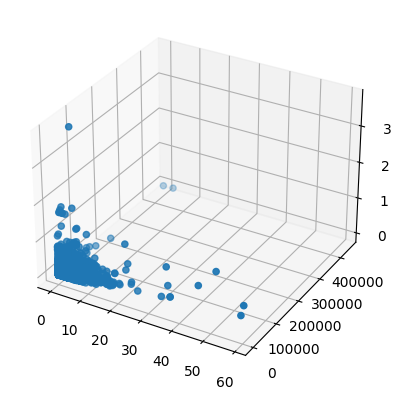

In [94]:
ax=plt.axes(projection="3d")
ax.scatter(x_data['bedrooms'],x_data['sqft'],y_data)

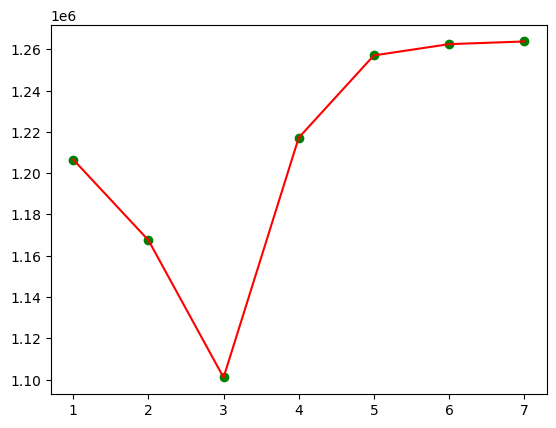

In [95]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   x= poly_model.fit_transform(x_data)
   poly_model.fit(x, y_data)
  
   lr = LinearRegression()
   lr.fit(x, y_data)
   y_pred = lr.predict(x)
  
   plt_mean_squared_error.append(mean_squared_error(y_data, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

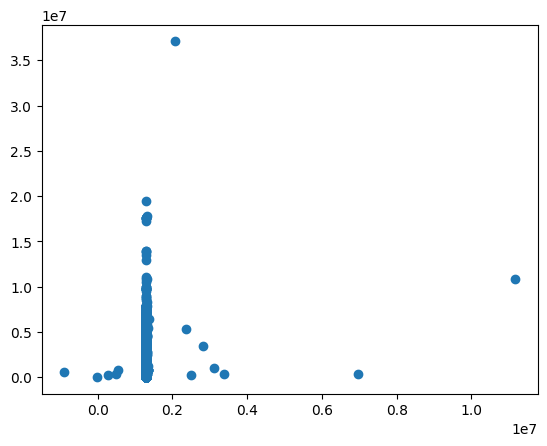

In [97]:
plt.scatter(y_pred,y_data)

In [109]:
i=pd.DataFrame({'pred':y_pred})
print(i)

               pred
0      1.786008e+06
1      7.931780e+05
2      2.095452e+06
3      2.036997e+06
4      1.160589e+06
...             ...
12007  9.000859e+05
12008  9.260306e+05
12009  1.260894e+06
12010  6.351014e+05
12011  1.176276e+06

[12012 rows x 1 columns]


In [107]:
v=pd.DataFrame({'actual':y_data,'predicted':y_pred,'difference':y_pred-y_data})
print(v)

          actual     predicted    difference
0      4100000.0  1.786008e+06 -2.313992e+06
4       908000.0  7.931780e+05 -1.148220e+05
6      2600000.0  2.095452e+06 -5.045478e+05
7      4050000.0  2.036997e+06 -2.013003e+06
8      2400000.0  1.160589e+06 -1.239411e+06
...          ...           ...           ...
14727   765000.0  9.000859e+05  1.350859e+05
14728   630000.0  9.260306e+05  2.960306e+05
14729   998000.0  1.260894e+06  2.628942e+05
14730   830000.0  6.351014e+05 -1.948986e+05
14732   629000.0  1.176276e+06  5.472756e+05

[12012 rows x 3 columns]
